Data Preparation
---------------

In [2]:
%sql
SELECT count(*) FROM articles_all_csv where id is NULL;

count(1) 1908

In [3]:
%python
articles = spark.table("articles_all_csv")
display(articles.select("*"))

id title content 17283 House Republicans Fret About Winning Their Health Care Suit - The New York Times WASHINGTON — Congressional Republicans have a new fear when it comes to their health care lawsuit against the Obama administration: They might win. The incoming Trump administration could choose to no longer defend the executive branch against the suit, which challenges the administration’s authority to spend billions of dollars on health insurance subsidies for and Americans, handing House Republicans a big victory on issues. But a sudden loss of the disputed subsidies could conceivably cause the health care program to implode, leaving millions of people without access to health insurance before Republicans have prepared a replacement. That could lead to chaos in the insurance market and spur a political backlash just as Republicans gain full control of the government. To stave off that outcome, Republicans could find themselves in the awkward position of appropriating huge sums to temporarily prop up the Obama health care law, angering conservative voters who have been demanding an end to the law for years. In another twist, Donald J. Trump’s administration, worried about preserving executive branch prerogatives, could choose to fight its Republican allies in the House on some central questions in the dispute. Eager to avoid an ugly political pileup, Republicans on Capitol Hill and the Trump transition team are gaming out how to handle the lawsuit, which, after the election, has been put in limbo until at least late February by the United States Court of Appeals for the District of Columbia Circuit. They are not yet ready to divulge their strategy. “Given that this pending litigation involves the Obama administration and Congress, it would be inappropriate to comment,” said Phillip J. Blando, a spokesman for the Trump transition effort. “Upon taking office, the Trump administration will evaluate this case and all related aspects of the Affordable Care Act. ” In a potentially decision in 2015, Judge Rosemary M. Collyer ruled that House Republicans had the standing to sue the executive branch over a spending dispute and that the Obama administration had been distributing the health insurance subsidies, in violation of the Constitution, without approval from Congress. The Justice Department, confident that Judge Collyer’s decision would be reversed, quickly appealed, and the subsidies have remained in place during the appeal. In successfully seeking a temporary halt in the proceedings after Mr. Trump won, House Republicans last month told the court that they “and the ’s transition team currently are discussing potential options for resolution of this matter, to take effect after the ’s inauguration on Jan. 20, 2017. ” The suspension of the case, House lawyers said, will “provide the and his future administration time to consider whether to continue prosecuting or to otherwise resolve this appeal. ” Republican leadership officials in the House acknowledge the possibility of “cascading effects” if the payments, which have totaled an estimated $13 billion, are suddenly stopped. Insurers that receive the subsidies in exchange for paying costs such as deductibles and for eligible consumers could race to drop coverage since they would be losing money. Over all, the loss of the subsidies could destabilize the entire program and cause a lack of confidence that leads other insurers to seek a quick exit as well. Anticipating that the Trump administration might not be inclined to mount a vigorous fight against the House Republicans given the ’s dim view of the health care law, a team of lawyers this month sought to intervene in the case on behalf of two participants in the health care program. In their request, the lawyers predicted that a deal between House Republicans and the new administration to dismiss or settle the case “will produce devastating consequences for the individuals who receive these reductions, as well as for the nati

In [4]:
%python
articles = articles.dropna('any')
articles.count()

Out[ 2 ]: 142528

In [5]:
%python
articles.createOrReplaceTempView("articles")

In [6]:
%sql
SELECT * FROM articles WHERE content is NULL;

id title content

In [7]:
%python
from pyspark.ml.feature import Tokenizer, StopWordsRemover

# Tokenize text
tokenizer = Tokenizer(inputCol='content', outputCol='words')
df_words_token = tokenizer.transform(articles)

In [8]:
%python
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, StringType

drop_chars = '.?!()" ,;-_”[]()’“&^`’*:#@1234567890$‘'

@udf(ArrayType(StringType()))
def filter_words(arr):
  arr = [x.strip(drop_chars) for x in arr]
  return [x for x in arr if len(x)>1]

df_words_token = df_words_token.withColumn('words', filter_words(df_words_token.words))
display(df_words_token)

id title content words 17283 House Republicans Fret About Winning Their Health Care Suit - The New York Times WASHINGTON — Congressional Republicans have a new fear when it comes to their health care lawsuit against the Obama administration: They might win. The incoming Trump administration could choose to no longer defend the executive branch against the suit, which challenges the administration’s authority to spend billions of dollars on health insurance subsidies for and Americans, handing House Republicans a big victory on issues. But a sudden loss of the disputed subsidies could conceivably cause the health care program to implode, leaving millions of people without access to health insurance before Republicans have prepared a replacement. That could lead to chaos in the insurance market and spur a political backlash just as Republicans gain full control of the government. To stave off that outcome, Republicans could find themselves in the awkward position of appropriating huge sums to temporarily prop up the Obama health care law, angering conservative voters who have been demanding an end to the law for years. In another twist, Donald J. Trump’s administration, worried about preserving executive branch prerogatives, could choose to fight its Republican allies in the House on some central questions in the dispute. Eager to avoid an ugly political pileup, Republicans on Capitol Hill and the Trump transition team are gaming out how to handle the lawsuit, which, after the election, has been put in limbo until at least late February by the United States Court of Appeals for the District of Columbia Circuit. They are not yet ready to divulge their strategy. “Given that this pending litigation involves the Obama administration and Congress, it would be inappropriate to comment,” said Phillip J. Blando, a spokesman for the Trump transition effort. “Upon taking office, the Trump administration will evaluate this case and all related aspects of the Affordable Care Act. ” In a potentially decision in 2015, Judge Rosemary M. Collyer ruled that House Republicans had the standing to sue the executive branch over a spending dispute and that the Obama administration had been distributing the health insurance subsidies, in violation of the Constitution, without approval from Congress. The Justice Department, confident that Judge Collyer’s decision would be reversed, quickly appealed, and the subsidies have remained in place during the appeal. In successfully seeking a temporary halt in the proceedings after Mr. Trump won, House Republicans last month told the court that they “and the ’s transition team currently are discussing potential options for resolution of this matter, to take effect after the ’s inauguration on Jan. 20, 2017. ” The suspension of the case, House lawyers said, will “provide the and his future administration time to consider whether to continue prosecuting or to otherwise resolve this appeal. ” Republican leadership officials in the House acknowledge the possibility of “cascading effects” if the payments, which have totaled an estimated $13 billion, are suddenly stopped. Insurers that receive the subsidies in exchange for paying costs such as deductibles and for eligible consumers could race to drop coverage since they would be losing money. Over all, the loss of the subsidies could destabilize the entire program and cause a lack of confidence that leads other insurers to seek a quick exit as well. Anticipating that the Trump administration might not be inclined to mount a vigorous fight against the House Republicans given the ’s dim view of the health care law, a team of lawyers this month sought to intervene in the case on behalf of two participants in the health care program. In their request, the lawyers predicted that a deal between House Republicans and the new administration to dismiss or settle the case “will produce devastating consequences for the individuals who receive these reductions, as well as for th

In [9]:
%python
# Remove stop words
remover = StopWordsRemover(inputCol='words', outputCol='words_clean')
df_words_no_stopw = remover.transform(df_words_token).select('id', 'title','words_clean')
display(df_words_no_stopw)

id title words_clean 17283 House Republicans Fret About Winning Their Health Care Suit - The New York Times List(washington, congressional, republicans, new, fear, comes, health, care, lawsuit, obama, administration, might, win, incoming, trump, administration, choose, longer, defend, executive, branch, suit, challenges, administration’s, authority, spend, billions, dollars, health, insurance, subsidies, americans, handing, house, republicans, big, victory, issues, sudden, loss, disputed, subsidies, conceivably, cause, health, care, program, implode, leaving, millions, people, without, access, health, insurance, republicans, prepared, replacement, lead, chaos, insurance, market, spur, political, backlash, republicans, gain, full, control, government, stave, outcome, republicans, find, awkward, position, appropriating, huge, sums, temporarily, prop, obama, health, care, law, angering, conservative, voters, demanding, end, law, years, another, twist, donald, trump’s, administration, worried, preserving, executive, branch, prerogatives, choose, fight, republican, allies, house, central, questions, dispute, eager, avoid, ugly, political, pileup, republicans, capitol, hill, trump, transition, team, gaming, handle, lawsuit, election, put, limbo, least, late, february, united, states, court, appeals, district, columbia, circuit, yet, ready, divulge, strategy, given, pending, litigation, involves, obama, administration, congress, inappropriate, comment, said, phillip, blando, spokesman, trump, transition, effort, upon, taking, office, trump, administration, evaluate, case, related, aspects, affordable, care, act, potentially, decision, judge, rosemary, collyer, ruled, house, republicans, standing, sue, executive, branch, spending, dispute, obama, administration, distributing, health, insurance, subsidies, violation, constitution, without, approval, congress, justice, department, confident, judge, collyer’s, decision, reversed, quickly, appealed, subsidies, remained, place, appeal, successfully, seeking, temporary, halt, proceedings, mr, trump, won, house, republicans, last, month, told, court, transition, team, currently, discussing, potential, options, resolution, matter, take, effect, inauguration, jan, suspension, case, house, lawyers, said, provide, future, administration, time, consider, whether, continue, prosecuting, otherwise, resolve, appeal, republican, leadership, officials, house, acknowledge, possibility, cascading, effects, payments, totaled, estimated, billion, suddenly, stopped, insurers, receive, subsidies, exchange, paying, costs, deductibles, eligible, consumers, race, drop, coverage, since, losing, money, loss, subsidies, destabilize, entire, program, cause, lack, confidence, leads, insurers, seek, quick, exit, well, anticipating, trump, administration, might, inclined, mount, vigorous, fight, house, republicans, given, dim, view, health, care, law, team, lawyers, month, sought, intervene, case, behalf, two, participants, health, care, program, request, lawyers, predicted, deal, house, republicans, new, administration, dismiss, settle, case, produce, devastating, consequences, individuals, receive, reductions, well, nation’s, health, insurance, health, care, systems, generally, matter, happens, house, republicans, say, want, prevail, two, overarching, concepts, congressional, power, purse, right, congress, sue, executive, branch, violates, constitution, regarding, spending, power, house, republicans, contend, congress, never, appropriated, money, subsidies, required, constitution, suit, initially, championed, john, boehner, house, speaker, time, later, house, committee, reports, republicans, asserted, administration, desperate, funding, required, treasury, department, provide, despite, widespread, internal, skepticism, spending, proper, white, house, said, spending, permanent, part, law, passed, annual, appropriation, required, even, though, administration, initially, sought, one, important, house, republicans, jud

In [10]:
%python
from pyspark.sql.functions import explode

df_words_exploded = df_words_no_stopw.withColumn('word', explode('words_clean')).select('id', 'title', 'word')
display(df_words_exploded)

id title word 17283 House Republicans Fret About Winning Their Health Care Suit - The New York Times washington 17283 House Republicans Fret About Winning Their Health Care Suit - The New York Times congressional 17283 House Republicans Fret About Winning Their Health Care Suit - The New York Times republicans 17283 House Republicans Fret About Winning Their Health Care Suit - The New York Times new 17283 House Republicans Fret About Winning Their Health Care Suit - The New York Times fear 17283 House Republicans Fret About Winning Their Health Care Suit - The New York Times comes 17283 House Republicans Fret About Winning Their Health Care Suit - The New York Times health 17283 House Republicans Fret About Winning Their Health Care Suit - The New York Times care 17283 House Republicans Fret About Winning Their Health Care Suit - The New York Times lawsuit 17283 House Republicans Fret About Winning Their Health Care Suit - The New York Times obama 17283 House Republicans Fret About Winning Their Health Care Suit - The New York Times administration 17283 House Republicans Fret About Winning Their Health Care Suit - The New York Times might 17283 House Republicans Fret About Winning Their Health Care Suit - The New York Times win 17283 House Republicans Fret About Winning Their Health Care Suit - The New York Times incoming 17283 House Republicans Fret About Winning Their Health Care Suit - The New York Times trump 17283 House Republicans Fret About Winning Their Health Care Suit - The New York Times administration 17283 House Republicans Fret About Winning Their Health Care Suit - The New York Times choose 17283 House Republicans Fret About Winning Their Health Care Suit - The New York Times longer 17283 House Republicans Fret About Winning Their Health Care Suit - The New York Times defend 17283 House Republicans Fret About Winning Their Health Care Suit - The New York Times executive 17283 House Republicans Fret About Winning Their Health Care Suit - The New York Times branch 17283 House Republicans Fret About Winning Their Health Care Suit - The New York Times suit 17283 House Republicans Fret About Winning Their Health Care Suit - The New York Times challenges 17283 House Republicans Fret About Winning Their Health Care Suit - The New York Times administration’s 17283 House Republicans Fret About Winning Their Health Care Suit - The New York Times authority 17283 House Republicans Fret About Winning Their Health Care Suit - The New York Times spend 17283 House Republicans Fret About Winning Their Health Care Suit - The New York Times billions 17283 House Republicans Fret About Winning Their Health Care Suit - The New York Times dollars 17283 House Republicans Fret About Winning Their Health Care Suit - The New York Times health 17283 House Republicans Fret About Winning Their Health Care Suit - The New York Times insurance 17283 House Republicans Fret About Winning Their Health Care Suit - The New York Times subsidies 17283 House Republicans Fret About Winning Their Health Care Suit - The New York Times americans 17283 House Republicans Fret About Winning Their Health Care Suit - The New York Times handing 17283 House Republicans Fret About Winning Their Health Care Suit - The New York Times house 17283 House Republicans Fret About Winning Their Health Care Suit - The New York Times republicans 17283 House Republicans Fret About Winning Their Health Care Suit - The New York Times big 17283 House Republicans Fret About Winning Their Health Care Suit - The New York Times victory 17283 House Republicans Fret About Winning Their Health Care Suit - The New York Times issues 17283 House Republicans Fret About Winning Their Health Care Suit - The New York Times sudden 17283 House Republicans Fret About Winning Their Health Care Suit - The New York Times loss 17283 House Republicans Fret About Winning Their Health Care Suit - The New York Times disputed 17283 House Republicans Fret About Winning Their Health Care Suit - The New Yor

## Inverted Index

In [12]:
df_group = df_words_exploded.groupBy('word', 'title').count().cache()

In [13]:
word_count = df_group.groupby('word').sum('count').withColumnRenamed('sum(count)', 'appearances').cache()
display(word_count)

word appearances incoming 2988 librarian 223 still 79476 arguments 4271 art 9612 clinics 1772 clinton’s 23795 confidentiality 371 everyday 2028 hope 19285 inflammatory 730 involving 5124 lieutenant 1274 online 16810 pools 1030 recognize 4684 requirement 2205 sabayon 5 trail 5143 unequivocal 286 harder 5853 waters 3222 inner 2510 electrical 897 parishes 184 embrace 4338 shipyard 71 strawberry 207 travel 12663 hanna 229 persist 619 vladimir 5297 poetry 1029 jewelry 889 transaction 1097 standards 7240 singling 263 cubs 1354 doubts 1954 wields 152 viewpoint 423 suspensions 284 timetable 405 connected 4004 prisdent 1 poppy 129 circulates 44 safeguarding 191 likelihood 1472 hanchett 660 أنه 4 oscar 2695 shroud 104 sidelined 394 bidders 293 gloria 589 jiahao 1 kuffar 58 kushida’s 1 medicare 3050 oscarssowhite 197 precautionary 145 priority 4212 ruben 183 traveling 3507 brands 2391 barrier 1514 guernsey 22 indicator 668 isp 56 carnegie 591 rightsidewire 1 filing 3675 finance,”the 1 creativity 762 crest 190 spared 539 commanders 1258 l’enfant 42 cautious 1380 distancing 311 megalomaniacal 20 bazaar 141 mckane 20 digitized 84 ceylon 7 creigh 12 indigenous 1453 paramedics 310 usaamah 16 hydrate 25 guts 505 spoiling 107 input 949 fog 398 gidley 68 thwart 517 feistier 8 pitcher 756 currents 301 lyrical 213 patton 509 theorists 322 tortured 929 pushback 671 concluding 570 gags 113 tarnish 175 intermountain 17 randomly 569 ingratitude 19 jacksonian 133 ces 242 courted 311 rabe 30 scapegoatof 1 turnovers 189 entrée 27 rejuvenate 50 debunked 460 teigen 76 döpfner 59 solicitors 28 scrapping 249 earl 436 wiconi 8 allia 1 unpresidented 38 tonnes 228 misogynist 309 gratification 181 yermolayev 2 pomeranz 24 smellers 3 handicapped 135 interaction 1083 diehards 58 cinven 40 elevate 469 mckeef 34 monte 447 nurshayeva 1 sorties 62 dilma 395 bottomed 48 destitute 97 biting 446 grieling 1 ransom 859 sophocles 15 babin 52 marrow 120 heinrich 356 fiscally 218 frieler 1 rhoadeses 1 blairs 1 brackets 258 turks 778 freaks 124 transmitted 786 traditionalist 169 methadone 167 cosponsor 13 carlo 188 deleterious 100 salafists 42 lanashadwick 147 accumulation 264 inverting 23 melodic 106 cowell 60 bellomo 3 sport’s 299 apprehensions 299 veteran’s 99 driscoll 86 she’’s 105 jettison 93 geographic’s 29 iaea’s 11 hilton’s 23 ineluctably 12 chiaramonte 3 ha’aretz 13 prisms 11 flashed 320 voyage 278 elsa 113 reassertion 34 choicethere’s 1 fermenting 22 outfit 841 tripping 114 degrade 220 inverted 104 monkfish 7 itt 237 embiid 31 kathmandu 120 yakutia 4 cdc’s 201 jammeh’s 89 pacquiao 150 battlefront 33 resourced 34 diringer 7 blossom 141 iframe 26 nunez 66 giga 2 baudhuin 9 mccarthyism 147 vanden 95 لسوريا 2 harasser 55 jildi 1 spoil 203 afterburners 9 inimical 53 bookshelf 60 heirhead 1 luntz’s 24 nicotine 174 schaeffer 56 parentheses 36 roundabout 93 chor 11 painters 105 aruba 41 imitation 269 letdown 69 cmadine@breitbart 6 globo 158 quakerism 2 trasiego 1 herzegovina 37 american’s 157 bolden 58 reviled 227 indoctrinated 68 honcho 64 invalidating 57 deftly 181 guerin 64 realdolls 7 staph 47 iffy 59 clog 78 ppb 42 militarized 149 orchards 82 kff 14 meinie 2 catenane 1 activewear 31 terwilliger 22 skidded 54 hegelich 5 cures 334 esitellään 1 antennae 41 pant 61 unavoidably 40 attanasio 2 photovoltaic 32 didi 288 malissa 33 schoenberg’s 6 steinem’s 20 marxism 129 hattan 2 neet 8 press’s 79 batley 37 nichole 26 lacrosse 109 wto 300 infinitesimal 25 torontonian 5 experience  1 alahu 1 balding 80 brentley 55 mendelsohn 75 premeditated 140 sommeil 6 farkas’s 7 hud 477 adimanjati 1 bava 16 formalities 34 wildcards 8 gandhi’s 22 kkr 280 vicissitudes 31 rapanos 2 uptodate 7 septa’s 2 t’s 44 implore 83 mooney 89 intermarrying 4 habanero 24 drutman 16 squealing 39 shanlon 2 windfalls 37 carbonate 33 automaker’s 74 tant 15 salma 67 diodes 6 hunnum 1 nsc’s 37 recommit 54 kragie 4 anime 112 hitched 91 krwg 1 reforestation 15 sagar 29 nowlisten 2 regnant 6 brant 32 feign 52 samhsa 47

In [14]:
from pyspark.sql.window import Window
from pyspark.sql.functions import rank, col, row_number

window = Window.partitionBy(df_group['word']).orderBy(df_group['count'].desc())

inverted_index = df_group.select('*', row_number().over(window).alias('rank')) \
  .filter(col('rank') <= 10).cache()
display(inverted_index)

word title count rank a7s Luxury, speed and high-tech protection for a very select few 1 1 abcnewsmelb City Installs ‘Female’ Traffic Signals for Equality, Gets Slammed for Stereotyping Women as Skirt-Wearing 2 1 abdellatif In Orlando, a Son of a Muslim Immigrant Rushed to Heal Pain Caused by Another - The New York Times 2 1 abdellatif World’s hottest month shows challenges global warming will bring 2 2 abdellatif Islamic State militants are kidnapping thousands of people to use as human shields 1 3 abdellatif Léa Seydoux: ’I have got lighter as I’ve got older’ 1 4 abdellatif Does Moonlight show gay cinema has to be sexless to succeed? 1 5 abdellatif Muslims and Christians in French Town Pray Old Bonds Survive Priest’s Murder - The New York Times 1 6 abdellatif Protesters demand fall of Egypt’s government over islands deal 1 7 abdellatif Iraqi villager lives to avenge hostages killed by Islamic State 1 8 abdellatif An epic Middle East heat wave could be global warmingâ€™s hellish curtain-raiser 1 9 abdellatif How Being a Woman Helped Marine Le Pen 1 10 abfoundation Alec Baldwin at War with Producer Over Underage Sex Scene Claims 12 1 abfoundation Alec Baldwin Will Count Down to End of Trump’s Term from Jan. 20 3 2 abfoundation Hollywood Melts over U.S. Withdrawal from Paris Accord: ’Crime Against Humanity’ 1 3 abfoundation Hollywood Freaks Out Over Trump’s ’Repugnant’ Temporary Refugee Ban - Breitbart 1 4 abfoundation Celebrities Melt Down During Inauguration: ’This Country Is Lost’ 1 5 abfoundation ’I Want to Quit Life’: Hollywood ’Devastated’ after Trump Win 1 6 abnormalize Media obsession with a bullshit email scandal helped Trump to the White House 2 1 abouaf French Jews Fear What’s Next After Marine Le Pen Makes It To The Second Round 3 1 abrupte Juanita Broaddrick, qui accuse Bill Clinton de viol, veut qu’on la croie 1 1 abruptness Anger mounts over handling of US attorney firings 1 1 abruptness ’Impartial’ BBC Uses ’Nixon Impeachment’ Dog-Whistle After Trump Fires FBI Director 1 2 abruptness NY Times: Being a Sanctuary City ’Not Enough’ 1 3 abruptness Iran Revokes Russia’s Use of Air Base, Saying Moscow ‘Betrayed Trust’ - The New York Times 1 4 abruptness Redstone seen resigning as Viacom chair after stepping down at CBS 1 5 abruptness In insurance Big Data could lower rates for optimistic tweeters 1 6 accumulation Blizzard Warning: High winds, about two feet of snow forecast for D.C. area 6 1 accumulation Business Leaders and the Mixed Feelings They Inspire 5 2 accumulation Blizzard warning updates: Moderate snow pasting Washington region 5 3 accumulation Trump’s 100 Days Have Made a Good Start on Regulation 4 4 accumulation Treacherous freezing rain tonight with dangerous road conditions; heavy rain tomorrow 4 5 accumulation Snowy tonight and Tuesday; accumulation forecast extremely difficult 4 6 accumulation Trisha Brown, Choreographer and Pillar of American Postmodern Dance, Dies at 80 - The New York Times 4 7 accumulation How much snow did Winter Storm Stella drop in your area? 4 8 accumulation Major storm could strike Pittsburgh, Philly, NYC, and Boston with up to a foot of snow on Thursday 2 9 accumulation Updates: Snow moving into D.C. area, precipitation to become heavy late tonight 2 10 acidity Research On Chinese Haze Helps Crack Mystery Of London’s Deadly 1952 Fog 3 1 acidity The creator of a bogus diet popularized by celebrities like Kate Hudson faces up to 3 years in prison 3 2 acidity Indonesia Wakes Up And Smells Its Own Coffee — Then Drinks It 2 3 acidity Diet soda contains chemicals found in rust remover 2 4 acidity How to hack your Keurig machine and get a better cup of coffee 2 5 acidity 3 Quick and Savory Recipes for Peak-of-the-Season Tomatoes - The New York Times 2 6 acidity Mozzarella Magic: How My Father And I Learned To Separate Curds And Whey 2 7 acidity How warming seas are forcing fish to seek new waters 2 8 acidity Giant Coral Reef in Protected Area Shows New Signs of Life - The New York Ti

In [15]:
%python
SEARCH_FOR = 'crime'
query_words = inverted_index.filter(col('word') == SEARCH_FOR)
display(query_words)

word title count rank crime The Cultural Roots of Crime 65 1 crime Why it’s so hard to prosecute a hate crime 61 2 crime Trump’s “law and order” executive orders, explained 54 3 crime Donald Trump wants to bring back the "tough on crime" policies that helped cause mass incarceration 36 4 crime The murder rate went up in 2015. It’s still half of what it was 25 years ago. 33 5 crime American policing is broken. Here’s how to fix it. 33 6 crime Major City Murders Rising by One-Third From 2014 to 2016, Admits Left-Wing Legal Group - Breitbart 33 7 crime The Specter of De-Gentrification: The Once and Future Suburb - Breitbart 33 8 crime Trump’s first 100 days have been a criminal justice callback to the 1980s and ’90s 31 9 crime Americans don’t know crime has plummeted. In fact, they think it’s gone up. 31 10

## Article Clustering
### Doc2Vec

In [17]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [18]:
df_rdd = df_words_no_stopw.rdd.cache()

In [19]:
class DocumentsIterator:
  def __iter__(self):
    for doc in df_rdd.toLocalIterator():
      yield TaggedDocument(doc['words_clean'], [doc['title']])
           
documents = DocumentsIterator()

In [20]:
model = Doc2Vec.load('../../dbfs/FileStore/1E4articles.model')

In [21]:
from tqdm import tqdm

max_epochs = 20
vec_size = 20
alpha = 0.025

model = Doc2Vec(vector_size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)

model.build_vocab(documents)

for epoch in tqdm(range(max_epochs)):
    #print('iteration {0}'.format(epoch))
    model.train(documents,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha
    model.save('dbfs/FileStore/1E4articles.model')

0%| | 0/20 [00:00<?, ?it/s]
 5%|▌ | 1/20 [07:56<2:30:48, 476.22s/it]
 10%|█ | 2/20 [15:44<2:22:08, 473.81s/it]
 15%|█▌ | 3/20 [23:34<2:13:54, 472.61s/it]
 20%|██ | 4/20 [31:10<2:04:42, 467.63s/it]
 25%|██▌ | 5/20 [38:44<1:55:56, 463.74s/it]
 30%|███ | 6/20 [46:39<1:48:57, 466.96s/it]
 35%|███▌ | 7/20 [54:22<1:40:54, 465.72s/it]
 40%|████ | 8/20 [1:02:13<1:33:29, 467.48s/it]
 45%|████▌ | 9/20 [1:09:52<1:25:12, 464.75s/it]
 50%|█████ | 10/20 [1:17:43<1:17:48, 466.88s/it]
 55%|█████▌ | 11/20 [1:25:35<1:10:13, 468.18s/it]
 60%|██████ | 12/20 [1:33:30<1:02:42, 470.29s/it]
 65%|██████▌ | 13/20 [1:41:23<54:58, 471.22s/it] 
 70%|███████ | 14/20 [1:49:16<47:09, 471.52s/it]
 75%|███████▌ | 15/20 [1:57:01<39:08, 469.68s/it]
 80%|████████ | 16/20 [2:04:48<31:15, 468.84s/it]
 85%|████████▌ | 17/20 [2:12:30<23:20, 466.93s/it]

In [22]:
from random import sample
print('Vectors for {} documents'.format(len(model.docvecs.doctags)))
for doc in sample(model.docvecs.doctags.keys(), k=10):
  print(doc)

Vectors for 142103 documents
Rand Paul: ’Lots of Crocodile Tears in DC’ for Comey
Man arrested for plotting terror attack on Times Square
The Trump administration just quietly admitted that the Iran deal is working
US imposes new Iran sanctions for ballistic missile testing
Catastrophic Flooding Leaves More Than 250 People Dead In Colombia
Is It Better to Be Poor in Bangladesh or the Mississippi Delta?
Fake News, Real Consequences
Trump Is Turning American Companies Into Reality-Show Contestants
UMass Resident Advisors Call Harambe Memes ’Direct Attack’ on African-Americans - Breitbart
The US government wants a court to hand over millions of Palantir shares allegedly used in a money-laundering scheme

In [23]:
similar_doc = model.docvecs.most_similar('U.S. lawmakers ask for disclosure of number of Americans under surveillance')

for doc_id, cosine in similar_doc:
  print(doc_id, cosine)

U.S. to withhold some Clinton emails with top secret information 0.9497215747833252
Trump administration returning Senate torture report 0.9357125759124756
U.S. to disclose estimate of number of Americans under surveillance 0.9350484609603882
House Republicans detail perjury allegations against Clinton 0.9339004755020142
Spy chief pressed for number of Americans ensnared in data espionage 0.9331401586532593
State Department says halts review of Clinton emails at FBI request 0.9288673400878906
Inspector General: Clinton emails had intel from most secretive, classified programs 0.9254295825958252
FBI unseals search warrant for Clinton emails 0.9251960515975952
FBI to release report on Hillary Clinton email investigation 0.9243849515914917
FBI files show Clinton claimed ignorance on classification 0.9227743148803711

### K-Means

In [25]:
title_col = [None for x in model.docvecs.doctags]
for doctag in model.docvecs.doctags:
  idx = model.docvecs._int_index(doctag, model.docvecs.doctags, model.docvecs.max_rawint)
  title_col[idx] = doctag

In [26]:
docvecs = model.docvecs.vectors_docs.tolist()
docvecs = [docvecs[i] + [title_col[i]] for i in range(len(docvecs))]
docvecs = spark.sparkContext.parallelize(docvecs)

In [27]:
from pyspark.ml.feature import VectorAssembler

feature_cols = ['f'+str(i) for i in range(vec_size)]
df_kmeans = spark.createDataFrame(docvecs, feature_cols  + ['title'])
vecAssembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
df_kmeans = vecAssembler.transform(df_kmeans)

display(df_kmeans)

f0 f1 f2 f3 f4 f5 f6 f7 f8 f9 f10 f11 f12 f13 f14 f15 f16 f17 f18 f19 title features 4.70013427734375 -2.5235557556152344 3.105170726776123 3.3365790843963623 -0.0532650463283062 0.5597339868545532 -3.3274452686309814 -6.7821364402771 -0.38955581188201904 5.159917831420898 -1.0830940008163452 -3.067692518234253 0.5767344832420349 6.2425336837768555 -3.426823377609253 -0.7045248746871948 0.056643545627593994 1.7763856649398804 1.0187612771987915 -3.053725481033325 House Republicans Fret About Winning Their Health Care Suit - The New York Times List(1, 20, List(), List(4.70013427734375, -2.5235557556152344, 3.105170726776123, 3.3365790843963623, -0.0532650463283062, 0.5597339868545532, -3.3274452686309814, -6.7821364402771, -0.38955581188201904, 5.159917831420898, -1.0830940008163452, -3.067692518234253, 0.5767344832420349, 6.2425336837768555, -3.426823377609253, -0.7045248746871948, 0.056643545627593994, 1.7763856649398804, 1.0187612771987915, -3.053725481033325)) -2.071354866027832 0.3550091087818146 5.234865188598633 1.2584227323532104 -3.0886521339416504 0.5998804569244385 0.29537755250930786 -3.1265029907226562 -6.6992363929748535 6.564136981964111 1.0597285032272339 -3.181554079055786 -1.1063106060028076 -0.2772994339466095 3.806384563446045 2.6655993461608887 2.780812978744507 2.962027072906494 -0.7824079990386963 -0.1727239191532135 Rift Between Officers and Residents as Killings Persist in South Bronx - The New York Times List(1, 20, List(), List(-2.071354866027832, 0.3550091087818146, 5.234865188598633, 1.2584227323532104, -3.0886521339416504, 0.5998804569244385, 0.29537755250930786, -3.1265029907226562, -6.6992363929748535, 6.564136981964111, 1.0597285032272339, -3.181554079055786, -1.1063106060028076, -0.2772994339466095, 3.806384563446045, 2.6655993461608887, 2.780812978744507, 2.962027072906494, -0.7824079990386963, -0.1727239191532135)) -1.531003713607788 0.47664299607276917 6.113579750061035 -0.7027242183685303 -4.6551103591918945 1.7947970628738403 0.9585490822792053 -2.396867036819458 0.6260127425193787 0.40122607350349426 -3.1151936054229736 -0.39453011751174927 1.506839632987976 -3.693345785140991 1.6170765161514282 5.6913957595825195 -0.7508108019828796 -1.0816023349761963 -1.69569730758667 0.13175137341022491 Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial Bias, Dies at 106 - The New York Times List(1, 20, List(), List(-1.531003713607788, 0.47664299607276917, 6.113579750061035, -0.7027242183685303, -4.6551103591918945, 1.7947970628738403, 0.9585490822792053, -2.396867036819458, 0.6260127425193787, 0.40122607350349426, -3.1151936054229736, -0.39453011751174927, 1.506839632987976, -3.693345785140991, 1.6170765161514282, 5.6913957595825195, -0.7508108019828796, -1.0816023349761963, -1.69569730758667, 0.13175137341022491)) 0.789682924747467 2.2401721477508545 0.7112268805503845 -0.13380686938762665 -6.084121227264404 0.3601037561893463 0.1177680715918541 0.19794069230556488 -1.6195030212402344 -1.2938945293426514 -0.755165696144104 -0.5426908135414124 0.7864400744438171 -1.318740725517273 0.34090471267700195 1.650792121887207 -3.7489676475524902 -1.7435855865478516 -1.6530615091323853 -0.31163784861564636 Among Deaths in 2016, a Heavy Toll in Pop Music - The New York Times List(1, 20, List(), List(0.789682924747467, 2.2401721477508545, 0.7112268805503845, -0.13380686938762665, -6.084121227264404, 0.3601037561893463, 0.1177680715918541, 0.19794069230556488, -1.6195030212402344, -1.2938945293426514, -0.755165696144104, -0.5426908135414124, 0.7864400744438171, -1.318740725517273, 0.34090471267700195, 1.650792121887207, -3.7489676475524902, -1.7435855865478516, -1.6530615091323853, -0.31163784861564636)) -1.8248270750045776 -3.200808048248291 3.757375478744507 -4.255273818969727 -3.004924774169922 0.13847973942756653 -4.611122131347656 -3.6149744987487793 1.1471928358078003 -0.5409377217292786 3.664360761642456 3.1460273265838623 2.829340696334839 4.26211404800415 1.677899956703186 2.470463991165161 -3.97756409645080

In [28]:
from tqdm import tqdm
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

dataset = df_kmeans

cost = [0 for x in range(40)]
for k in tqdm(range(2,40, 2)):
    kmeans = KMeans().setK(k).setFeaturesCol("features")
    kmeans_model = kmeans.fit(dataset.sample(False,0.1))
    cost[k] = kmeans_model.computeCost(df_kmeans)
    

0%| | 0/19 [00:00<?, ?it/s] 5%|▌ | 1/19 [00:06<02:01, 6.73s/it] 11%|█ | 2/19 [00:13<01:53, 6.65s/it] 16%|█▌ | 3/19 [00:19<01:45, 6.61s/it] 21%|██ | 4/19 [00:25<01:36, 6.45s/it] 26%|██▋ | 5/19 [00:31<01:27, 6.28s/it] 32%|███▏ | 6/19 [00:37<01:20, 6.17s/it] 37%|███▋ | 7/19 [00:43<01:13, 6.11s/it] 42%|████▏ | 8/19 [00:49<01:07, 6.14s/it] 47%|████▋ | 9/19 [00:56<01:02, 6.21s/it] 53%|█████▎ | 10/19 [01:01<00:54, 6.06s/it] 58%|█████▊ | 11/19 [01:07<00:47, 5.96s/it] 63%|██████▎ | 12/19 [01:13<00:41, 5.91s/it] 68%|██████▊ | 13/19 [01:19<00:35, 5.84s/it] 74%|███████▎ | 14/19 [01:24<00:29, 5.84s/it] 79%|███████▉ | 15/19 [01:30<00:23, 5.89s/it] 84%|████████▍ | 16/19 [01:36<00:17, 5.90s/it] 89%|████████▉ | 17/19 [01:43<00:12, 6.21s/it] 95%|█████████▍| 18/19 [01:51<00:06, 6.82s/it]100%|██████████| 19/19 [01:59<00:00, 7.08s/it]

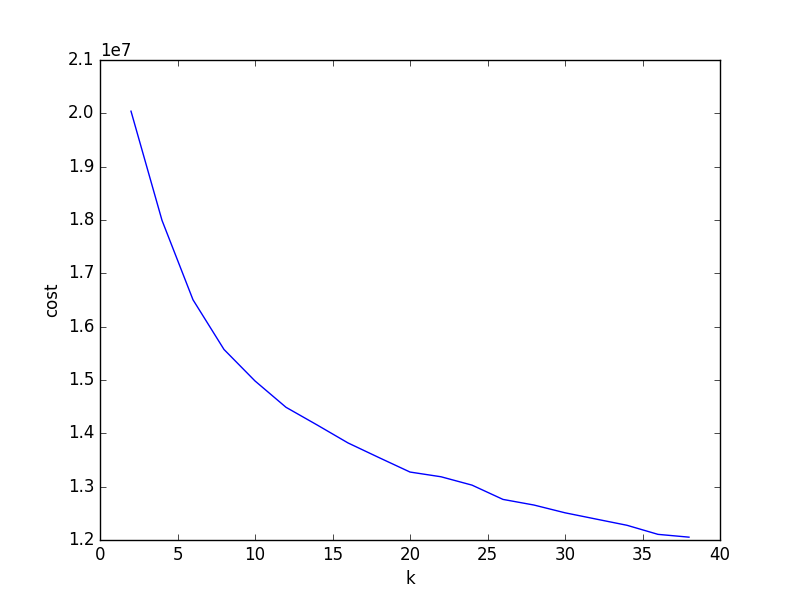

In [29]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(2,40,2),cost[2:40:2])
plt.xlabel('k')
plt.ylabel('cost')
display()

In [30]:
kmeans = KMeans().setK(20)
kmeans_model = kmeans.fit(dataset)
predictions = kmeans_model.transform(dataset)

centers = kmeans_model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[ 0.84524691 0.70605194 2.11395599 3.18702915 -1.60508323 -0.96538521
 -0.09515921 -4.03129559 -1.05425661 2.57736963 -2.69137689 -3.6835433
 -0.14242585 1.32054495 -1.49816635 0.22833876 -0.46846558 3.45808128
 -1.27194869 -2.05988942]
[-4.12950477 1.84836226 2.40592239 2.11154544 -2.35153551 0.77702451
 -3.47250489 -3.13042696 -1.1989044 -0.01232715 -1.15734804 -0.68197783
 -0.35689851 -1.47100169 -7.88361924 0.47412855 -0.21021949 1.80774651
 -0.38035989 -1.16666927]
[ 2.46114808 -0.36396846 0.68801463 0.21522598 -0.05673038 0.31560426
 -0.19218967 -0.77543639 0.15267059 0.79856006 -0.91398385 0.67729218
 -1.68574463 2.57586176 -1.09904527 1.93870667 -0.29662659 0.3355084
 -3.05151415 -0.21838989]
[ 0.32056041 2.20830052 2.85388549 -1.4787598 2.89818862 3.16360124
 -3.32259524 -0.32700159 1.52893566 -2.65656079 -0.76641568 -2.17277614
 -1.15302268 2.51458372 -1.120372 2.22046549 -3.21669868 2.42096112
 -2.11476703 2.09769861]
[-0.08549574 -0.44190011 2.3027076 -2.81736941 1.84559816 -0.04444437
 -2.09759597 -2.51666906 0.90767218 -0.25999514 1.70542847 3.00118494
 -0.60538565 2.85237172 -0.30373754 3.4781631 -2.78787862 -0.67518934
 -4.2116964 3.11128969]
[-1.99914005 1.90443203 3.29002035 -0.28762811 -8.04890847 2.63716944
 -0.69842791 0.19392322 -2.32745916 1.21397391 2.11136904 -1.31552925
 -1.08367381 4.69556294 -1.62474729 -1.70539165 -4.23158302 4.26932034
 1.11354647 2.21648902]
[-0.22108207 2.42438017 2.89663021 0.08048854 -7.39145557 0.98559096
 0.23963599 -0.93908637 -0.45261921 -0.62312048 -1.46496918 0.66380713
 0.77248791 0.42916716 -0.52339153 1.51023428 -0.17572644 -1.3434796
 -2.51134469 -0.90351931]
[ 1.96869979 2.49277187 -0.07071204 0.14917676 -1.64452461 -0.91285431
 -0.23426835 -0.06563576 -0.80809041 1.14314164 -0.18373946 -0.29372474
 -1.38657865 4.65912563 -1.02330749 1.17311199 0.44488228 0.21217472
 -3.04115699 -2.46064561]
[-2.19450841 1.12895159 1.03063849 -0.83345556 -3.30347775 4.21796899
 -1.10049553 -1.59327305 1.92568444 1.87802579 -0.60964153 1.56434408
 -0.70839212 3.83531764 -2.85302299 1.85799261 2.71425207 1.92821953
 -0.14174232 3.68277625]
[ 1.54686458 -1.22419909 3.09185773 -2.13401233 0.3017503 3.56260741
 -2.52773883 -1.94353446 0.41252313 3.10922538 -1.81048382 0.76694751
 -3.87051584 3.15856615 -3.26023879 2.39359205 1.03499228 1.93515269
 0.43523582 1.10282683]
[-4.54260184 0.38103507 2.71123722 1.32535392 -1.71768157 0.73138299
 -0.04217293 -4.44900549 -4.99445078 2.11698036 -0.3182777 -2.11810314
 -0.83108159 0.45770023 1.2249243 1.02537027 1.08823005 1.56792005
 -1.62187988 -0.82742882]
[-3.17677362 -2.3401773 2.96625743 -0.25470584 -2.21830733 0.81065596
 -1.50782693 -2.62419792 -3.03856299 -1.41104035 -1.03799969 3.23889386
 -0.61438736 -1.05911908 -5.76884104 1.21178798 -1.28536863 1.42106648
 -2.79580077 4.16265333]
[-5.16104713 2.40974706 2.32790039 -0.62371017 1.57173591 1.69974169
 -2.48465023 -2.88559728 -1.31351353 -1.91948938 0.78175585 -2.13463298
 0.18053524 0.21481003 1.53031574 3.07395145 -1.34721482 0.98298179
 -3.05945756 2.42177542]
[-0.27752662 -0.15567532 -0.18149688 -0.40176601 0.9915687 -0.14787911
 0.15195691 -2.63506861 -1.28710082 4.87087005 0.97987986 2.64292531
 1.55990916 4.97995465 -0.75431719 2.31980626 -0.8569325 0.46631707
 -4.38371734 -0.04599923]
[-3.04131232 1.22503222 0.69059508 -0.42639904 1.98747325 -2.90464076
 -3.73673877 -4.18656677 -2.41242485 -2.05801578 3.15743062 0.82877103
 -0.9641536 1.55189782 -1.92573231 3.4246474 -3.57921126 -1.8388508
 -3.12110283 2.09801862]
[ 2.94099356e+00 -3.23671109e-01 -2.18056046e-01 1.29565431e+00
 -4.63033904e-03 -8.80680602e-01 -1.44641028e+00 -9.61977833e-01
 -1.48258118e+00 1.86857518e+00 -6.86297289e-01 -3.24753734e-01
 -2.67464601e+00 5.42541955e+00 -5.10553367e+00 6.51465251e-02
 -7.35605522e-01 2.34855369e+00 -1.34218693e+00 -1.04758479e+00]
[-0.12835895 0.6229861 0.60189182 1.90711766 0.30025925 -2.03987438
 0.52127789 -3.00270938 -2.1619582 0.52475693 -0.98688298 -1.80385224

In [31]:
predictions_articles = predictions.select('title', 'prediction').cache()
display(predictions_articles)

title prediction House Republicans Fret About Winning Their Health Care Suit - The New York Times 0 Rift Between Officers and Residents as Killings Persist in South Bronx - The New York Times 10 Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial Bias, Dies at 106 - The New York Times 18 Among Deaths in 2016, a Heavy Toll in Pop Music - The New York Times 6 Kim Jong-un Says North Korea Is Preparing to Test Long-Range Missile - The New York Times 4 Sick With a Cold, Queen Elizabeth Misses New Year’s Service - The New York Times 19 Taiwan’s President Accuses China of Renewed Intimidation - The New York Times 4 After ‘The Biggest Loser,’ Their Bodies Fought to Regain Weight - The New York Times 1 First, a Mixtape. Then a Romance. - The New York Times 6 Calling on Angels While Enduring the Trials of Job - The New York Times 18 Weak Federal Powers Could Limit Trump’s Climate-Policy Rollback - The New York Times 2 Can Carbon Capture Technology Prosper Under Trump? - The New York Times 11 Mar-a-Lago, the Future Winter White House and Home of the Calmer Trump - The New York Times 18 How to form healthy habits in your 20s - The New York Times 1 Turning Your Vacation Photos Into Works of Art - The New York Times 18 As Second Avenue Subway Opens, a Train Delay Ends in (Happy) Tears - The New York Times 18 Dylann Roof Himself Rejects Best Defense Against Execution - The New York Times 0 Modi’s Cash Ban Brings Pain, but Corruption-Weary India Grits Its Teeth - The New York Times 3 Suicide Bombing in Baghdad Kills at Least 36 - The New York Times 14 Fecal Pollution Taints Water at Melbourne’s Beaches After Storm - The New York Times 11 N.F.L. Playoffs: Schedule, Matchups and Odds - The New York Times 5 Mariah Carey’s Manager Blames Producers for New Year’s Eve Nightmare - The New York Times 17 Damaged by War, Syria’s Cultural Sites Rise Anew in France - The New York Times 19 George Michael’s Freedom Video: An Oral History - The New York Times 6 With New Congress Poised to Convene, Obama’s Policies Are in Peril - The New York Times 15 Republicans Stonewalled Obama. Now the Ball Is in Their Court. - The New York Times 15 Istanbul, Donald Trump, Benjamin Netanyahu: Your Morning Briefing - The New York Times 2 Inside Trump Defense Secretary Pick’s Efforts to Halt Torture - The New York Times 14 ISIS Claims Responsibility for Istanbul Nightclub Attack - The New York Times 12 The Afghan War and the Evolution of Obama - The New York Times 14 Tips for Your Post-Holiday Clutter Purge - The New York Times 18 Benjamin Netanyahu Questioned in Israel Graft Inquiry - The New York Times 4 France Lets Workers Turn Off, Tune Out and Live Life - The New York Times 18 Airline Pilot, Believed to Be Drunk, Is Pulled From Cockpit in Canada - The New York Times 10 Riot by Drug Gangs in Brazil Prison Leaves at Least 56 Dead - The New York Times 12 SpaceX Says It’s Ready to Launch Rockets Again - The New York Times 11 A ‘World Unto Itself’ in New York Area Yeshivas: Floor Hockey - The New York Times 18 Inside Jonathan Lethem’s Oddball Trove - The New York Times 6 An Immigrant’s Instinct to Aid Others Collides With Financial Need - The New York Times 19 House Republicans, Under Fire, Back Down on Gutting Ethics Office - The New York Times 0 Republican Party, Megyn Kelly, Titanic: Your Wednesday Briefing - The New York Times 19 Turmoil Overshadows First Day of Republican-Controlled Congress - The New York Times 15 With Choice of Trade Negotiator, Trump Prepares to Confront Mexico and China - The New York Times 9 Trump Appears to Side With Assange Over Intelligence Agencies’ Conclusions - The New York Times 13 California Hires Eric Holder as Legal Bulwark Against Donald Trump - The New York Times 0 Israeli Soldier Who Shot Wounded Palestinian Assailant Is Convicted - The New York Times 19 Work. Walk 5 Minutes. Work. - The New York Times 1 It’s Time to Ignore Advice About Which Stocks to Buy in 2017 - The New York Times 9 Megyn Kelly’s Jump to NBC From Fox News Will Test Her

In [32]:
from pyspark.sql.functions import collect_set, col

cluster_words = df_group.join(predictions_articles, 'title') \
                .groupby('word', 'prediction') \
                .sum('count') \
                .withColumnRenamed('sum(count)', 'count') \
                .cache()

filtered_word_count = word_count.filter(col('appearances') > 1500)
filtered_word_count = filtered_word_count.filter(col('appearances') < 200000)

cluster_words = cluster_words.join(filtered_word_count, 'word', how='right')
cluster_words = cluster_words.withColumn('fraction', cluster_words['count'] / cluster_words['appearances'])

display(cluster_words)

word prediction count appearances fraction arguments 6 124 4271 0.02903301334582065 arguments 5 29 4271 0.0067899789276516034 arguments 19 199 4271 0.04659330367595411 arguments 9 145 4271 0.03394989463825802 arguments 12 46 4271 0.010770311402481855 arguments 16 480 4271 0.11238585811285413 arguments 17 129 4271 0.03020369936782955 arguments 2 553 4271 0.12947787403418404 arguments 14 47 4271 0.011004448606883634 arguments 18 65 4271 0.015218918286115664 arguments 1 89 4271 0.020838211191758372 arguments 15 321 4271 0.0751580426129712 arguments 10 186 4271 0.043549520018730976 arguments 7 253 4271 0.0592367127136502 arguments 13 232 4271 0.05431983142121283 arguments 8 75 4271 0.017560290330133458 arguments 0 872 4271 0.20416764223835168 arguments 4 131 4271 0.030671973776633107 arguments 3 206 4271 0.048232264106766565 arguments 11 89 4271 0.020838211191758372 art 13 95 9612 0.00988347898460258 art 10 137 9612 0.014253017062005826 art 8 118 9612 0.01227632126508531 art 18 2915 9612 0.30326674989596336 art 4 145 9612 0.015085310029130253 art 5 74 9612 0.007698709945900957 art 2 750 9612 0.0780274656679151 art 17 647 9612 0.0673116937161881 art 9 102 9612 0.010611735330836454 art 7 341 9612 0.035476487723678736 art 6 2077 9612 0.21608406158967958 art 11 214 9612 0.022263836870578445 art 19 1059 9612 0.11017478152309614 art 12 162 9612 0.016853932584269662 art 14 42 9612 0.004369538077403246 art 0 227 9612 0.02361631294215564 art 16 200 9612 0.020807324178110695 art 3 56 9612 0.005826050769870994 art 15 105 9612 0.010923845193508116 art 1 146 9612 0.015189346650020807 barrier 6 46 1514 0.03038309114927345 barrier 7 44 1514 0.02906208718626156 barrier 16 106 1514 0.07001321003963012 barrier 18 62 1514 0.04095112285336856 barrier 4 56 1514 0.036988110964332896 barrier 17 48 1514 0.031704095112285335 barrier 11 278 1514 0.18361955085865259 barrier 19 92 1514 0.0607661822985469 barrier 3 49 1514 0.03236459709379128 barrier 1 112 1514 0.07397622192866579 barrier 10 82 1514 0.05416116248348745 barrier 12 55 1514 0.03632760898282695 barrier 13 25 1514 0.016512549537648614 barrier 15 62 1514 0.04095112285336856 barrier 14 23 1514 0.015191545574636724 barrier 5 31 1514 0.02047556142668428 barrier 8 54 1514 0.035667107001321 barrier 9 71 1514 0.04689564068692206 barrier 0 83 1514 0.0548216644649934 barrier 2 135 1514 0.0891677675033025 brands 6 60 2391 0.025094102885821833 brands 17 371 2391 0.15516520284399832 brands 19 21 2391 0.00878293601003764 brands 1 106 2391 0.044332915098285235 brands 4 12 2391 0.005018820577164366 brands 14 4 2391 0.001672940192388122 brands 18 454 2391 0.18987871183605187 brands 16 6 2391 0.002509410288582183 brands 5 14 2391 0.005855290673358427 brands 12 33 2391 0.013801756587202008 brands 8 757 2391 0.3166039314094521 brands 0 39 2391 0.01631116687578419 brands 2 102 2391 0.04265997490589712 brands 15 28 2391 0.011710581346716854 brands 10 6 2391 0.002509410288582183 brands 11 15 2391 0.006273525721455458 brands 7 40 2391 0.016729401923881223 brands 13 7 2391 0.0029276453366792136 brands 3 90 2391 0.037641154328732745 brands 9 226 2391 0.0945211208699289 clinics 6 22 1772 0.012415349887133182 clinics 13 5 1772 0.0028216704288939053 clinics 16 27 1772 0.015237020316027089 clinics 17 24 1772 0.013544018058690745 clinics 2 42 1772 0.023702031602708805 clinics 9 11 1772 0.006207674943566591 clinics 7 21 1772 0.011851015801354402 clinics 5 6 1772 0.003386004514672686 clinics 3 9 1772 0.005079006772009029 clinics 10 43 1772 0.024266365688487584 clinics 15 108 1772 0.060948081264108354 clinics 19 31 1772 0.017494356659142212 clinics 8 6 1772 0.003386004514672686 clinics 12 26 1772 0.014672686230248307 clinics 11 10 1772 0.0056433408577878106 clinics 4 1 1772 5.64334085778781E-4 clinics 0 724 1772 0.40857787810383744 clinics 18 8 1772 0.004514672686230248 clinics 14 70 1772 0.039503386004514675 clinics 1 578 1772 0.3261851015801354 clinton’s 7 7030 23795 0.2954402185333053 clinton’s 13 6629 23795 0.278587938642572 

In [33]:
window = Window.partitionBy(cluster_words['prediction']).orderBy(cluster_words['fraction'].desc())

cluster_words_res = cluster_words.select('*', row_number().over(window).alias('rank')) \
  .filter(col('rank') <= 20).cache()

cluster_words_res = cluster_words_res.groupBy('prediction').agg(collect_set('word').alias('words'))
display(cluster_words_res)

prediction words 12 List(cartel, brussels, belgian, manchester, airport, rio, attackers, swedish, turkey’s, migrant, migrants, turkish, sweden, coup, duterte, istanbul, detained, erdogan, asylum, attacker) 1 List(outbreak, fda, zika, virus, symptoms, patients, genetic, mosquitoes, infected, disease, clinical, mosquito, treatments, autism, vaccine, cdc, diet, bacteria, diseases, infection) 13 List(comey, nsa, hacking, server, schiff, fbi, abedin, cia, comey’s, collusion, fbi’s, leaks, mueller, flynn’s, nunes, flynn, yates, kislyak, intelligence, classified) 6 List(songs, music, album, lyrics, comedy, episodes, pop, show’s, movie, film, episode, jazz, comic, movies, musical, band, films, song, characters, broadway) 16 List(firearms, dakota, mateen, demonstrators, guns, deportation, dhs, policing, ferguson, gun, rouge, shootings, nypd, sanctuary, orlando, tribe, protesters, baton, refuge, pipeline) 3 List(france’s, pen, cent, theresa, brexit, netherlands, merkel, european, britain’s, chancellor, bloc, parliament, eu, britain, labour, macron, cameron, referendum, le, parliamentary) 5 List(scored, coach, yankees, championship, tournament, ball, nfl, players, knicks, nba, giants, league, player, jets, curry, yards, quarterback, warriors, mets, patriots) 19 List(israeli, islam, jesus, holy, egypt, palestinian, palestinians, francis, pope, jerusalem, christians, israel’s, jews, cuban, cuba, catholic, castro, jewish, holocaust, egyptian) 15 List(repealing, aca, obamacare, caucuses, margin, repeal, insurers, delegate, sanders’s, medicaid, kasich, filibuster, caucus, medicare, ryan’s, gop’s, delegates, turnout, premiums, contests) 9 List(stocks, economists, crude, inflation, wells, fed, monetary, index, stimulus, exports, dow, bonds, mnuchin, imports, dollar, reserve, nasdaq, securities, fargo, s&p) 17 List(o’reilly, cosby, boycott, espn, milo, actress, gawker, trans, academy, harassment, feminist, ailes, awards, celebrities, yiannopoulos, oscar, sexist, instagram, anthem, makeup) 4 List(missile, iran, tillerson, korea, putin’s, ballistic, xi, nuclear, sanctions, iran’s, korean, ukraine, taiwan, nato, missiles, pyongyang, jong, netanyahu, korea’s, peninsula) 8 List(apple, uber, apps, apple’s, iphone, yahoo, motors, startup, tesla, acquisition, merger, musk, inc, software, microsoft, samsung, smartphone, antitrust, android, google) 7 List(realdonaldtrump, kaine, lewandowski, debates, melania, gingrich, conway, msnbc, biden, hannity, pac, carson, palin, pence, jeb, sexist, weiner, hillary’s, kellyanne, mate) 10 List(bail, shooter, jurors, felony, patrol, cop, inmates, sheriff’s, officer, police, custody, shooting, firearm, sheriff, cops, hernandez, nypd, shootings, officers, fatally) 11 List(solar, species, hurricane, birds, storm, weather, arctic, warming, mars, fish, moon, ocean, winds, nasa, scientists, snow, planet, temperatures, temperature, earth) 14 List(airstrikes, civilians, iraqi, casualties, afghan, rebel, mosul, aleppo, taliban, rebels, assad, fighters, raqqa, baghdad, syrian, bashar, sunni, militants, syria’s, kurdish) 2 List(roosevelt, nafta, mexicans, vox, conservatism, gingrich, nixon, romney, elites, coal, populist, pruitt, populism, tpp, reagan, inaugural, reader, mitt, bannon, nationalism) 0 List(schools, transgender, campus, scalia, abortion, gorsuch, faculty, teachers, justices, devos, colleges, antonin, legislature, students, abortions, charter, bathrooms, clinics, school’s, court’s) 18 List(cream, restaurant, designer, fashion, art, painting, chicken, design, taste, listing, wedding, beer, restaurants, museum, cooking, wine, cheese, kitchen, coffee, meal)

In [34]:
cat_names = ['tech', 'law', 'healthcare', 'science', 'crimes', 'entertainment', 'finances', 'polls', 'medicine', 'nsa', 'disasters','religion', 'faggot', 'presidents', 'justice', 'war', 'sports', 'europe', 'terrorism', 'home']

### Visualization of Clusters - t-SNE

In [36]:
predictions_sample = predictions.sample(False,0.1)
predictions_sample.count()

Out[ 50 ]: 14106

In [37]:
from sklearn.manifold import TSNE
import numpy as np

X = np.squeeze(np.array(predictions_sample.select('features').collect()))
embedding = TSNE(n_components=2, verbose=1, perplexity=50).fit_transform(X)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 14106
[t-SNE] Computed conditional probabilities for sample 2000 / 14106
[t-SNE] Computed conditional probabilities for sample 3000 / 14106
[t-SNE] Computed conditional probabilities for sample 4000 / 14106
[t-SNE] Computed conditional probabilities for sample 5000 / 14106
[t-SNE] Computed conditional probabilities for sample 6000 / 14106
[t-SNE] Computed conditional probabilities for sample 7000 / 14106
[t-SNE] Computed conditional probabilities for sample 8000 / 14106
[t-SNE] Computed conditional probabilities for sample 9000 / 14106
[t-SNE] Computed conditional probabilities for sample 10000 / 14106
[t-SNE] Computed conditional probabilities for sample 11000 / 14106
[t-SNE] Computed conditional probabilities for sample 12000 / 14106
[t-SNE] Computed conditional probabilities for sample 13000 / 14106
[t-SNE] Computed conditional probabilities for sample 14000 / 14106
[t-SNE] Computed conditional probabilities for sample 14106 / 14106
[t-SNE] Mean sigma: 3.316844
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.948469
[t-SNE] Error after 275 iterations: 0.948469

In [38]:
predictions_col = [x.prediction for x in predictions_sample.select('prediction').rdd.collect()]

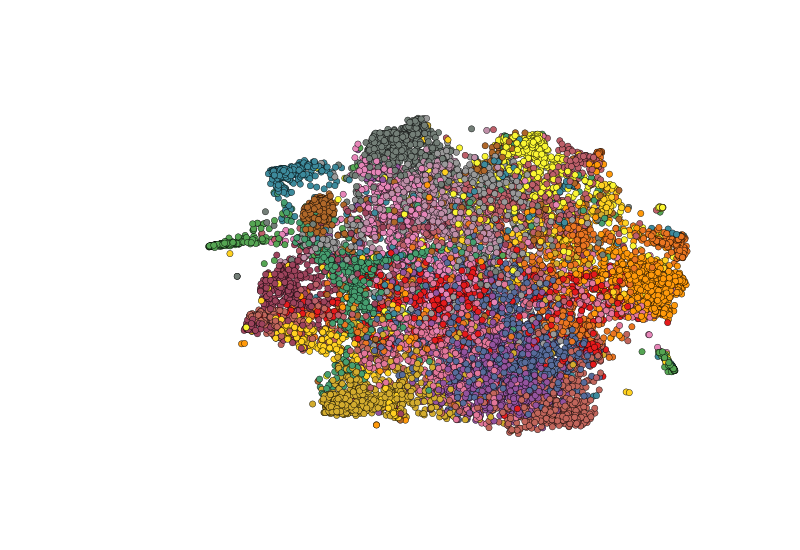

In [39]:
plt.figure()
plt.scatter(embedding[:,0], embedding[:,1], c=predictions_col, cmap='Set1')
display()
plt.clear()

In [40]:
from pyspark.mllib.linalg import Vectors
from pyspark.mllib.linalg.distributed import RowMatrix

rows = sc.parallelize(X)

mat = RowMatrix(rows)
pc = mat.computePrincipalComponents(2)
projected = np.array(mat.multiply(pc).rows.collect())

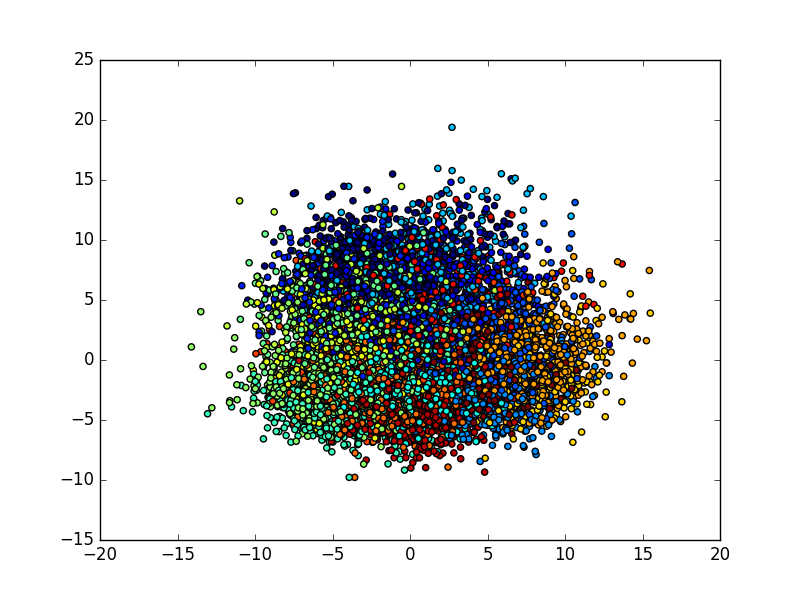

In [41]:
plt.figure()
plt.scatter(projected[:,0], projected[:,1], c=predictions.select('prediction').collect())
display()